In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.106542116884668 et b_1=5.040460571624892


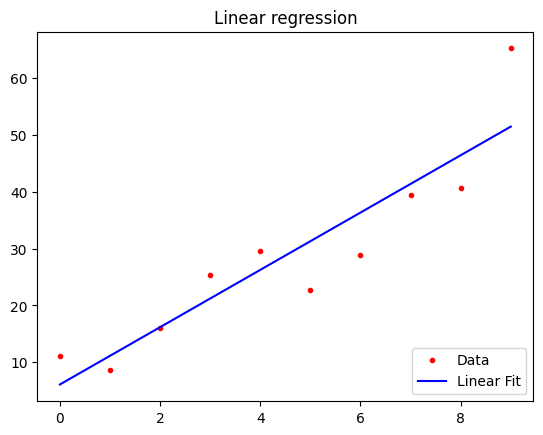

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 





Essai numero 1
b_0=10.669388795924895 et b_1=3.968899559454149
s2=11.275984145274125


Essai numero 2
b_0=8.825283676223595 et b_1=4.006183267609797
s2=4.167031993074493


Essai numero 3
b_0=11.256592556770347 et b_1=3.909849807394778
s2=6.2172057657143025


Essai numero 4
b_0=7.369925315728221 et b_1=4.245831054279434
s2=13.611529983387028


Essai numero 5
b_0=7.677077491442187 et b_1=4.280516617067987
s2=3.7260396692293494


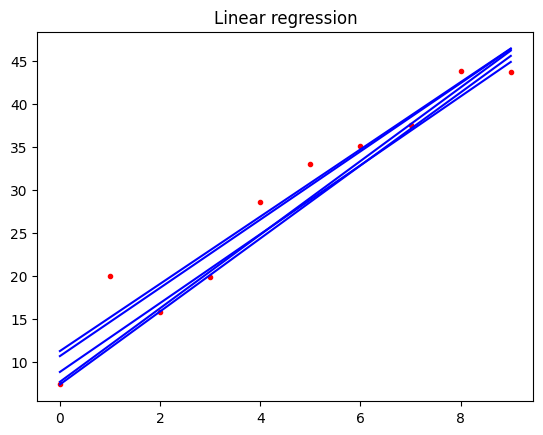



Essai numero 1
b_0=4.553201153979224 et b_1=5.185745380414774
s2=32.19601333813143


Essai numero 2
b_0=4.9033546552977825 et b_1=5.358691925676596
s2=25.53085672063559


Essai numero 3
b_0=7.613462211404155 et b_1=5.131313646180507
s2=20.089672042192976


Essai numero 4
b_0=6.531574566008199 et b_1=5.453290416591015
s2=29.034178650843533


Essai numero 5
b_0=7.5032723351568364 et b_1=4.96840462478582
s2=17.247263310235912


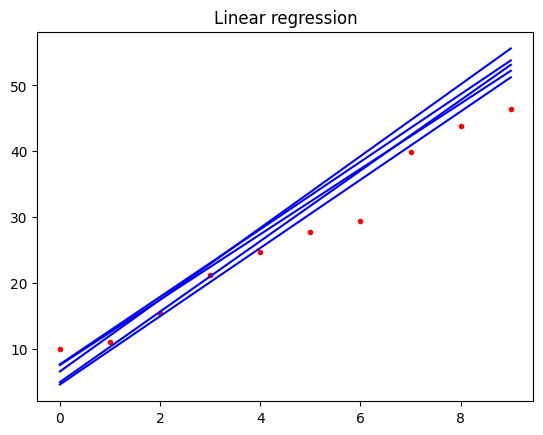

In [18]:
...
fig = plt.figure()
plt.plot(x, y, 'r.')
for i in range(5):
    print('\n\nEssai numero '+str(i+1))
    x, y = generate_data(n_samples=10, outlier=False)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat

    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
    print('s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))
    
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
plt.show()
fig = plt.figure()
plt.plot(x, y, 'r.')
for i in range(5):
    print('\n\nEssai numero '+str(i+1))
    x, y = generate_data(n_samples=10, outlier=True)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat

    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
    print('s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))
    
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
plt.show()


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


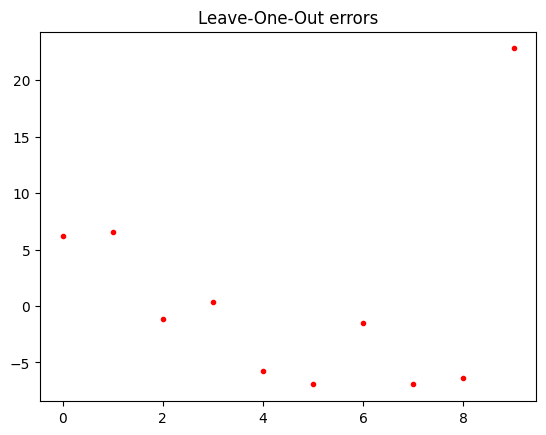

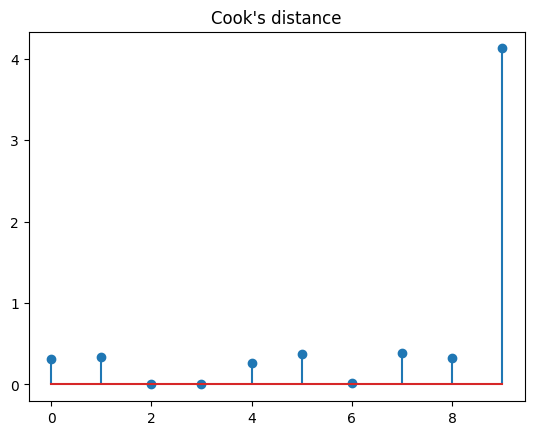

In [ ]:
x, y = generate_data(n_samples=10, outlier=True)
erreur= np.zeros(len(x))
for i in range(len(x)):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)  # np.new
    y_j=lr.predict(x[:, np.newaxis])
    erreur[i]= (y[i]-y_j[i])
figure = plt.figure()
plt.plot(x, erreur, 'r.')
plt.title('Leave-One-Out errors')
plt.show() 
# Cooks distance
cooks_d = (erreur**2) / (2 * s2(y, lr.predict(x[:, np.newaxis])))
figure = plt.figure()
plt.stem(x, cooks_d)
plt.title("Cook's distance")
plt.show()   
    

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [36]:
def profil_residuel(x, y, i):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    y_j=lr.predict(x[:, np.newaxis])
    
    return y[i] - y_j[i]

In [ ]:
...

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [34]:
def cook(x, y, i):
    erreur=profil_residuel(x, y, i)
    di= (erreur**2) / (2 * s2(y, lr.predict(x[:, np.newaxis])))
    
    return di

#### <span style="color:blue">REPONSE 4.2.c :</span> 


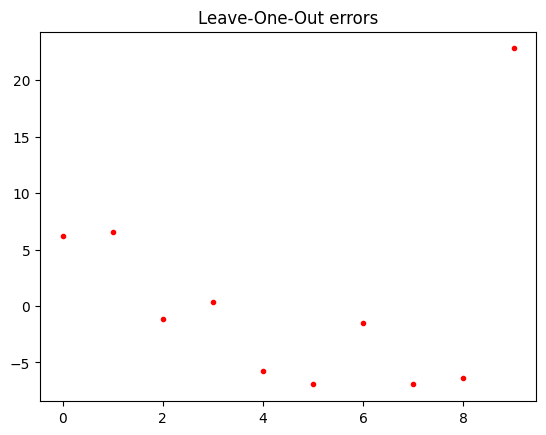

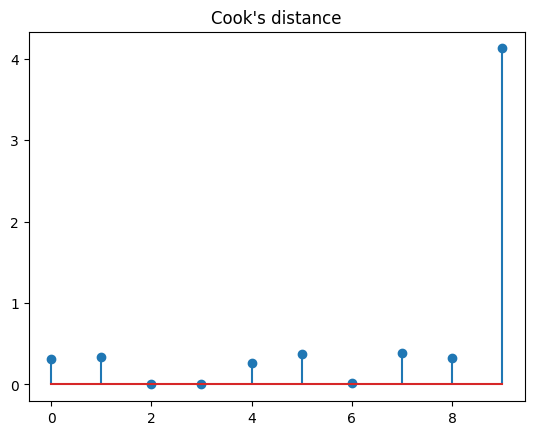

In [37]:
...
erreur= np.zeros(len(x))
for i in range(len(x)):
    erreur[i]=profil_residuel(x, y, i)
figure = plt.figure()
plt.plot(x, erreur, 'r.')
plt.title('Leave-One-Out errors')
plt.show() 
# Cooks distance
cooks_d = [cook(x, y, i) for i in range(len(x))]
figure = plt.figure()
plt.stem(x, cooks_d)
plt.title("Cook's distance")
plt.show()   


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t
x, y = generate_data(n_samples=20, outlier=True,b_1=0.2)


...